In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def solve(X, y):
    C = np.dot(np.transpose(X),X)
    G = np.linalg.inv(C)
    G = G * np.dia

    B = np.dot(np.dot(G, np.transpose(X)),Y)
    return B

In [12]:
# generate x and Y values for y=2x+5+E
l = 26
x0 = np.array([1 for _ in range(l)])
x1 = np.array([x/5 for x in range(l)]) # from 0 to 5, step 0.2
X = np.array([[x0[i], x1[i]] for i in range(len(x1))])
Y = np.array([-2*x+11+random.random()-1 for x in x1])

print(X.T)
print(Y)

[[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
   2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5. ]]
[ 10.42798547  10.47519633  10.16122899   8.95687697   8.70570461
   8.9761101    8.4129205    7.7999329    7.59427712   7.23502128
   6.26007505   5.93097887   5.88298436   4.9151664    4.94741537
   4.89185354   4.10105862   3.86427319   2.92736714   3.35715506
   2.25070674   2.34354121   2.17390506   1.68923028   1.17705906
   0.40388351]


In [5]:
B = solve(X, Y)
print(B)

[ 10.6537638   -2.03499802]


In [13]:
def twodots(X, B):  # duct-tape for plot
    X, Y = X[:, 1], np.dot(X,B)
    xs = [X[0], X[-1]]
    ys = [Y[0], Y[-1]]
    return xs, ys

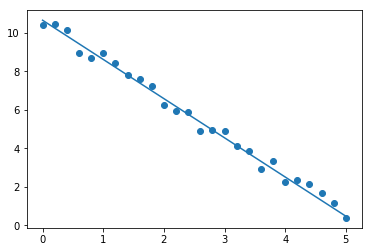

In [14]:
plt.figure()
plt.scatter(x=X[:, 1], y=Y)
plt.plot(twodots(X, B)[0], twodots(X, B)[1])  # plot(x, y)
plt.show()